In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:\\Users\\Benja\\OneDrive\\Desktop\\Data Science Raw Data\\AirPassengers.csv')

In [2]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.rename(columns={'#Passengers': 'AirPassengers'}, inplace=True)

In [4]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

## Train Test Split

In [5]:
len(df)

144

In [6]:
325-12

313

In [7]:
train, test = df[:-12], df[-12:]

In [8]:
len(test)

12

In [9]:
test

,AirPassengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


## Scale Data

In [10]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [11]:
test

array([[0.68791209],
       [0.63076923],
       [0.69230769],
       [0.78461538],
       [0.80879121],
       [0.94725275],
       [1.13846154],
       [1.1032967 ],
       [0.88791209],
       [0.78461538],
       [0.62857143],
       [0.72087912]])

### Create the Model

In [12]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [13]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit_generator(generator,epochs=90)

Epoch 1/90

20/20 [==============================] - 1s 7ms/step - loss: 0.0801
Epoch 2/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 3/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 4/90
20/20 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 5/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 6/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 7/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 8/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 9/90
20/20 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 10/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 11/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0100
Epoch 12/90
20/20 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 13/90
20/20 [=============================

In [16]:
model.history.history.keys()

dict_keys(['loss'])

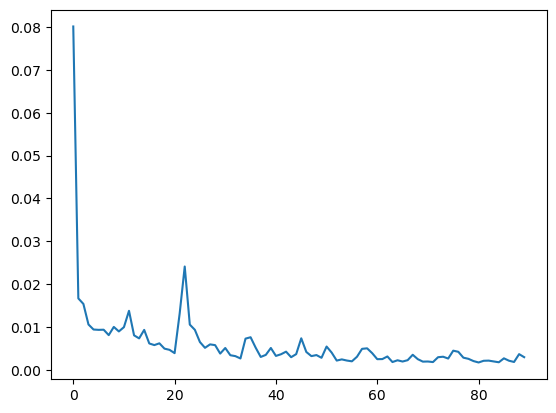

In [17]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [18]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [19]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


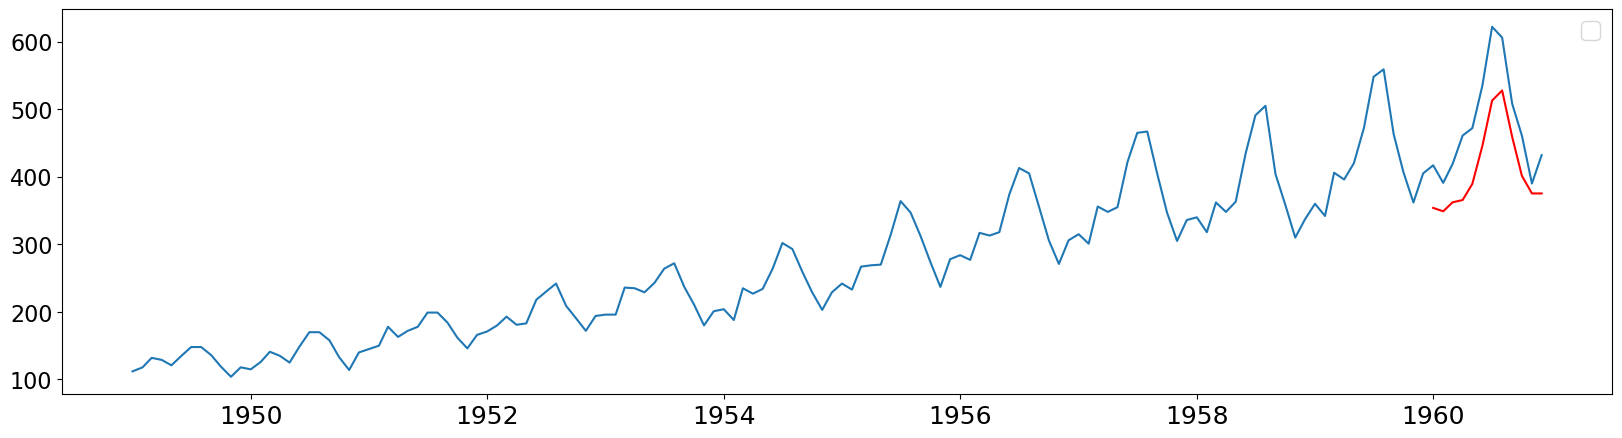

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AirPassengers'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [21]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [70.84878839]


In [22]:
train = df

In [23]:
scaler.fit(train)
train = scaler.transform(train)

In [24]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [25]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 2/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 3/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 4/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 5/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 6/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 7/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 8/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 9/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 10/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 11/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 12/90
22/22 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 13/90
22/22 [==============================

In [26]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
 # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])    
    pred_list.append(model.predict(batch)[0]) 
# update batch to now include prediction and drop first value    
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

1/1 [==============================] - 0s 19ms/step


In [27]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [28]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

In [29]:
pred_list

[array([0.61959803], dtype=float32),
 array([0.5963994], dtype=float32),
 array([0.6478706], dtype=float32),
 array([0.7185537], dtype=float32),
 array([0.8022339], dtype=float32),
 array([0.9684193], dtype=float32),
 array([1.1158689], dtype=float32),
 array([1.0527555], dtype=float32),
 array([0.86878496], dtype=float32),
 array([0.7445032], dtype=float32),
 array([0.6418885], dtype=float32),
 array([0.6602099], dtype=float32)]

In [30]:
test

array([[0.68791209],
       [0.63076923],
       [0.69230769],
       [0.78461538],
       [0.80879121],
       [0.94725275],
       [1.13846154],
       [1.1032967 ],
       [0.88791209],
       [0.78461538],
       [0.62857143],
       [0.72087912]])

## Inverse Transformations and Compare

In [31]:
true_predictions = scaler.inverse_transform(pred_list)

In [32]:
true_predictions

array([[424.95178008],
       [412.93490291],
       [439.59697092],
       [476.21082795],
       [519.55714715],
       [605.64120436],
       [682.02010369],
       [649.32733607],
       [554.0306114 ],
       [489.65265763],
       [436.49824262],
       [445.98872519]])

In [33]:
test

array([[0.68791209],
       [0.63076923],
       [0.69230769],
       [0.78461538],
       [0.80879121],
       [0.94725275],
       [1.13846154],
       [1.1032967 ],
       [0.88791209],
       [0.78461538],
       [0.62857143],
       [0.72087912]])

In [34]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
test

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['AirPassengers'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
## Save Predicted Results

In [ ]:
#df_proj.to_csv('C:\\Users\\Benja\\OneDrive\\Desktop\\Data Science Raw Data\\12-Month Forecast With LSTM.csv', index = None, header=True)